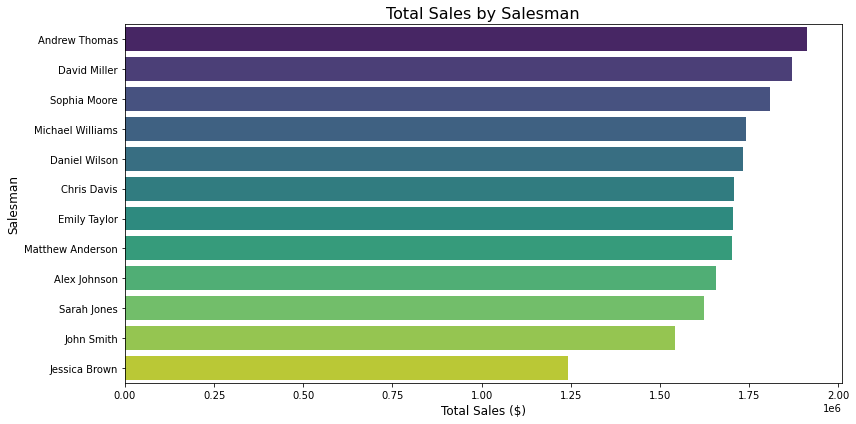

,salesman_id,name,total_sales,total_profit,avg_sale_price,num_sales
11,12,Andrew Thomas,1913832.55,370746.35,21503.736517,89
6,7,David Miller,1871077.50,311992.15,22012.676471,85
8,9,Sophia Moore,1807799.50,413378.05,20086.661111,90
2,3,Michael Williams,1740834.70,351331.30,20009.594253,87
7,8,Daniel Wilson,1731896.50,317687.95,19680.642045,88
5,6,Chris Davis,1707740.25,314182.25,19188.092697,89
9,10,Emily Taylor,1706316.20,300078.60,21598.939241,79
10,11,Matthew Anderson,1703005.75,376218.45,19134.896067,89
1,2,Alex Johnson,1656742.75,314992.05,20709.284375,80
3,4,Sarah Jones,1622801.55,193920.70,17832.984066,91


In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = 'automotive_data.xlsx' 
salesmen_data = pd.read_excel(file_path, sheet_name='Salesmen')
sales_data = pd.read_excel(file_path, sheet_name='Sales')

# Merge sales and salesmen data on 'salesman_id'
merged_data = pd.merge(sales_data, salesmen_data, on='salesman_id', how='left')

# Calculate performance metrics
performance_metrics = merged_data.groupby(['salesman_id', 'name']).agg(
    total_sales=('sale_price', 'sum'),
    total_profit=('profit', 'sum'),
    avg_sale_price=('sale_price', 'mean'),
    num_sales=('sale_id', 'count')
).reset_index()

# Sort by total_sales to identify top performers
performance_metrics = performance_metrics.sort_values(by='total_sales', ascending=False)

# Visualize Total Sales by Salesman
plt.figure(figsize=(12, 6))
sns.barplot(
    x='total_sales', 
    y='name', 
    data=performance_metrics, 
    palette='viridis'
)
plt.title('Total Sales by Salesman', fontsize=16)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Salesman', fontsize=12)
plt.tight_layout()
plt.show()

# Display the performance metrics
performance_metrics

In [15]:
# Extract year and month from sale_date
merged_data['sale_date'] = pd.to_datetime(merged_data['sale_date'])
merged_data['year_month'] = merged_data['sale_date'].dt.to_period('M')

# Group by year_month and salesman to calculate total sales
monthly_sales = merged_data.groupby(['year_month', 'salesman_id', 'name']).agg(
    total_sales=('sale_price', 'sum')
).reset_index()

# Find the top salesman for each month
top_salesmen = monthly_sales.loc[monthly_sales.groupby('year_month')['total_sales'].idxmax()]

# Sort the results by year_month
top_salesmen = top_salesmen.sort_values('year_month')

# Display the top salesmen
print("Top Salesman Each Month:")
print(top_salesmen)

Top Salesman Each Month:
    year_month  salesman_id              name  total_sales
2      2014-01            3  Michael Williams     69832.40
15     2014-02            7      David Miller     57699.00
20     2014-03            2      Alex Johnson     47847.80
29     2014-04            2      Alex Johnson     63785.00
44     2014-05            6       Chris Davis     89572.25
52     2014-06            3  Michael Williams     93562.00
66     2014-07            8     Daniel Wilson     61557.00
75     2014-08            6       Chris Davis     56554.00
81     2014-09            2      Alex Johnson     69768.75
97     2014-10           11  Matthew Anderson     61786.00
100    2014-11            3  Michael Williams     74803.00
116    2014-12            9      Sophia Moore     78868.25
123    2015-01            6       Chris Davis     70996.00
130    2015-02            1        John Smith    154606.40
144    2015-03            5     Jessica Brown     59671.00
156    2015-04            6    

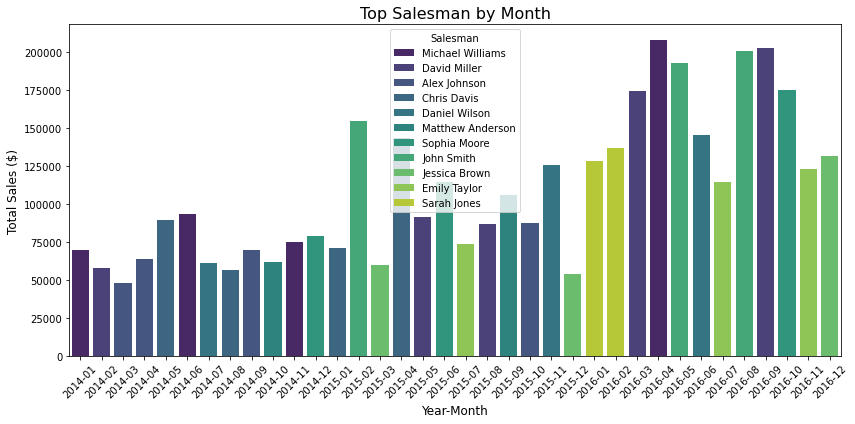

In [16]:
# Visualization: Top Salesman Each Month
plt.figure(figsize=(12, 6))
sns.barplot(
    x='year_month',
    y='total_sales',
    hue='name',
    data=top_salesmen,
    dodge=False,
    palette='viridis'
)
plt.title('Top Salesman by Month', fontsize=16)
plt.xlabel('Year-Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Salesman')
plt.tight_layout()
plt.show()

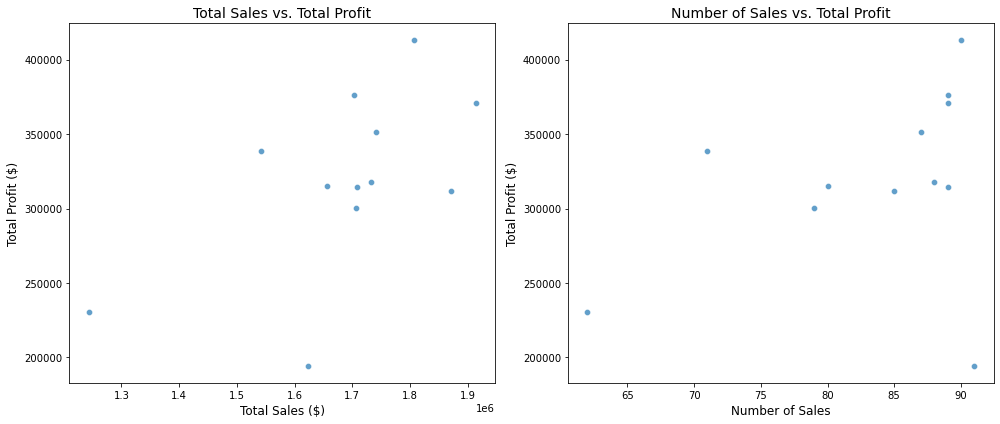

Correlation Matrix:
              total_sales  total_profit  num_sales
total_sales       1.00000      0.596200   0.813290
total_profit      0.59620      1.000000   0.354859
num_sales         0.81329      0.354859   1.000000


In [6]:
# Add calculated fields for analysis
merged_data['profit_per_sale'] = merged_data['profit']
merged_data['sale_month'] = pd.to_datetime(merged_data['sale_date']).dt.month

# Group data by salesperson for aggregated analysis
grouped_sales = merged_data.groupby('salesman_id').agg(
    total_sales=('sale_price', 'sum'),
    total_profit=('profit', 'sum'),
    num_sales=('sale_id', 'count')
).reset_index()

# Correlation analysis
correlation_matrix = grouped_sales[['total_sales', 'total_profit', 'num_sales']].corr()

# Visualize relationships with scatter plots
plt.figure(figsize=(14, 6))

# Total Sales vs. Total Profit
plt.subplot(1, 2, 1)
sns.scatterplot(x=grouped_sales['total_sales'], y=grouped_sales['total_profit'], alpha=0.7)
plt.title('Total Sales vs. Total Profit', fontsize=14)
plt.xlabel('Total Sales ($)', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)

# Number of Sales vs. Total Profit
plt.subplot(1, 2, 2)
sns.scatterplot(x=grouped_sales['num_sales'], y=grouped_sales['total_profit'], alpha=0.7)
plt.title('Number of Sales vs. Total Profit', fontsize=14)
plt.xlabel('Number of Sales', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)

plt.tight_layout()
plt.show()

# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

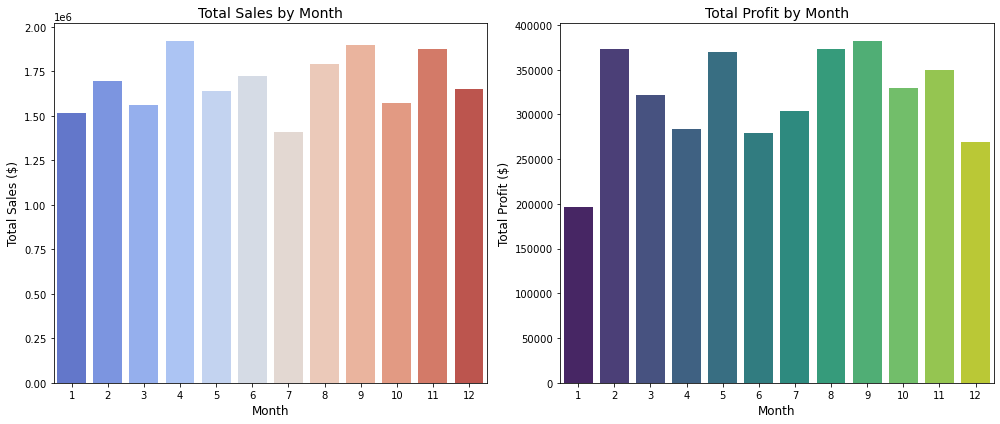

Seasonality Metrics:
    sale_month  total_sales  total_profit  avg_sale_price  num_sales
0            1   1517759.20     196478.30    18286.255422         83
1            2   1692546.40     372728.60    20640.809756         82
2            3   1563154.05     321763.50    17368.378333         90
3            4   1922575.20     283526.25    19225.752000        100
4            5   1636993.10     370232.65    19034.803488         86
5            6   1722982.65     279786.15    20270.384118         85
6            7   1407340.90     304391.90    18764.545333         75
7            8   1788525.45     373468.85    23227.603247         77
8            9   1896156.35     382644.05    23409.337654         81
9           10   1574314.80     329731.00    18521.350588         85
10          11   1876164.60     350033.25    23748.918987         79
11          12   1648696.75     268682.65    21411.646104         77


In [7]:
# Extract month from sale_date
merged_data['sale_month'] = pd.to_datetime(merged_data['sale_date']).dt.month

# Group data by month and calculate performance metrics
seasonality_metrics = merged_data.groupby('sale_month').agg(
    total_sales=('sale_price', 'sum'),
    total_profit=('profit', 'sum'),
    avg_sale_price=('sale_price', 'mean'),
    num_sales=('sale_id', 'count')
).reset_index()

# Visualization: Total Sales and Total Profit by Month
plt.figure(figsize=(14, 6))

# Total Sales by Month
plt.subplot(1, 2, 1)
sns.barplot(x=seasonality_metrics['sale_month'], y=seasonality_metrics['total_sales'], palette='coolwarm')
plt.title('Total Sales by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)

# Total Profit by Month
plt.subplot(1, 2, 2)
sns.barplot(x=seasonality_metrics['sale_month'], y=seasonality_metrics['total_profit'], palette='viridis')
plt.title('Total Profit by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Profit ($)', fontsize=12)

plt.tight_layout()
plt.show()

# Display the seasonality metrics table
print("Seasonality Metrics:")
print(seasonality_metrics)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


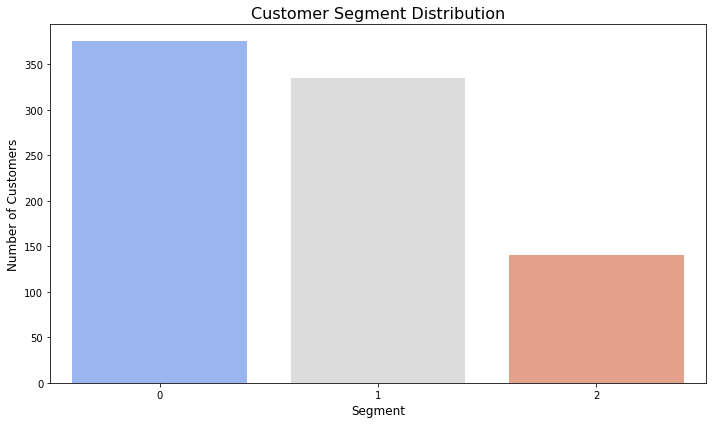

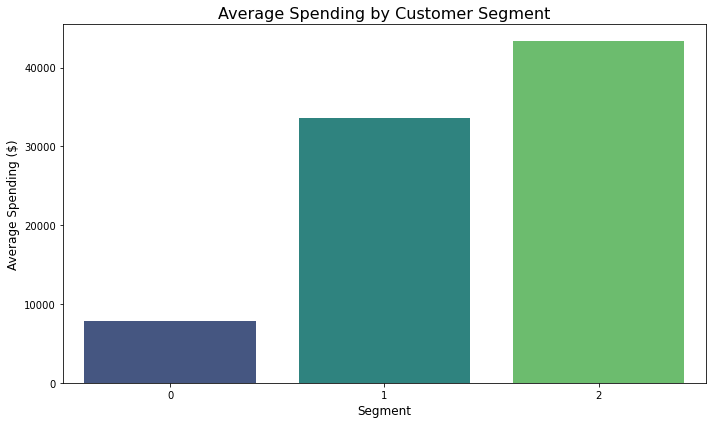

Segment Summary:
   segment  total_customers     avg_spent  avg_purchase  avg_purchases
0        0              375   7794.364400   7794.364400       1.000000
1        1              335  33615.164179  33615.164179       1.000000
2        2              140  43308.877143  20835.505774       2.071429


In [9]:
# Select features for segmentation (e.g., total purchase amount, number of purchases)
segmentation_data = merged_data.groupby('customer_id').agg(
    total_spent=('sale_price', 'sum'),
    avg_purchase=('sale_price', 'mean'),
    num_purchases=('sale_id', 'count')
).reset_index()

# Standardize the data for clustering
scaler = StandardScaler()
segmentation_features = scaler.fit_transform(segmentation_data[['total_spent', 'avg_purchase', 'num_purchases']])

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
segmentation_data['segment'] = kmeans.fit_predict(segmentation_features)

# Summarize each segment
segment_summary = segmentation_data.groupby('segment').agg(
    total_customers=('customer_id', 'count'),
    avg_spent=('total_spent', 'mean'),
    avg_purchase=('avg_purchase', 'mean'),
    avg_purchases=('num_purchases', 'mean')
).reset_index()

# Visualize segment distribution
plt.figure(figsize=(10, 6))
sns.barplot(x='segment', y='total_customers', data=segment_summary, palette='coolwarm')
plt.title('Customer Segment Distribution', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.tight_layout()
plt.show()

# Visualize spending by segment
plt.figure(figsize=(10, 6))
sns.barplot(x='segment', y='avg_spent', data=segment_summary, palette='viridis')
plt.title('Average Spending by Customer Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Average Spending ($)', fontsize=12)
plt.tight_layout()
plt.show()

# Display segment summary
print("Segment Summary:")
print(segment_summary)

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


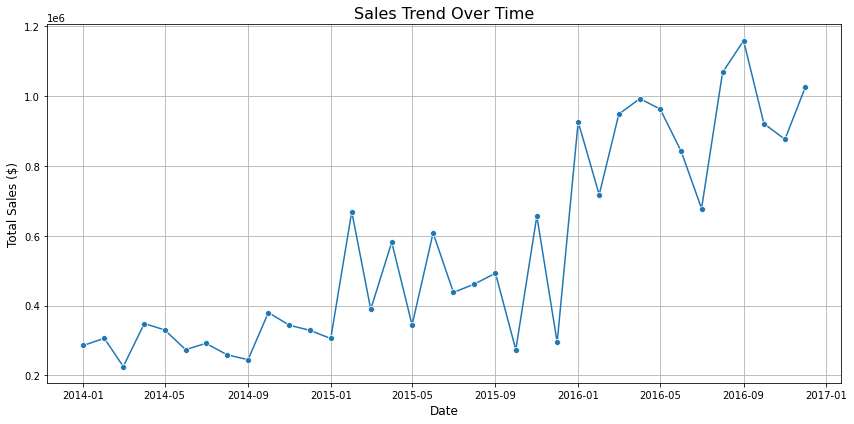

Mean Squared Error: 42714112147.61
R-Squared: 0.55


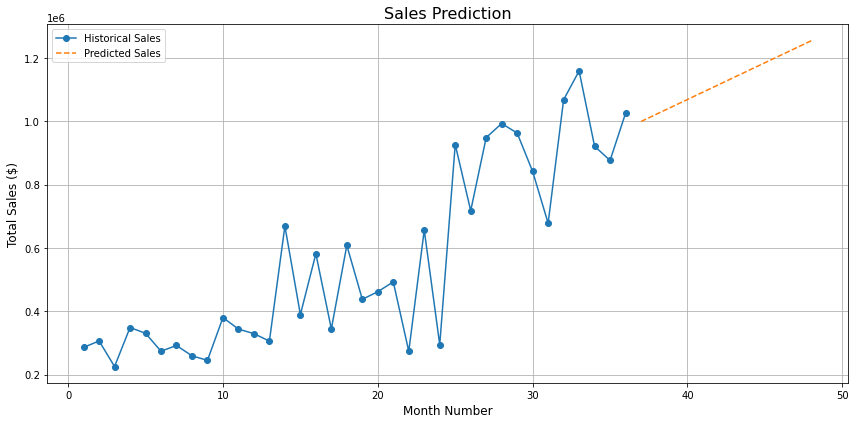

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Extract year and month for trend analysis
sales_data['sale_date'] = pd.to_datetime(sales_data['sale_date'])
sales_data['year'] = sales_data['sale_date'].dt.year
sales_data['month'] = sales_data['sale_date'].dt.month

# Aggregate monthly sales
monthly_sales = sales_data.groupby(['year', 'month']).agg(
    total_sales=('sale_price', 'sum')
).reset_index()

# Add a datetime column for plotting
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

# Visualize sales trends
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_sales', data=monthly_sales, marker='o')
plt.title('Sales Trend Over Time', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Sales Prediction

# Create features for prediction
monthly_sales['month_num'] = monthly_sales['date'].dt.month + (monthly_sales['year'] - monthly_sales['year'].min()) * 12

# Features (X) and target (y)
X = monthly_sales[['month_num']]
y = monthly_sales['total_sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-Squared: {r2:.2f}")

# Forecast future sales
future_months = pd.DataFrame({'month_num': range(monthly_sales['month_num'].max() + 1, monthly_sales['month_num'].max() + 13)})
future_sales = model.predict(future_months)

# Plot historical and predicted sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales['month_num'], monthly_sales['total_sales'], label='Historical Sales', marker='o')
plt.plot(future_months['month_num'], future_sales, label='Predicted Sales', linestyle='--')
plt.title('Sales Prediction', fontsize=16)
plt.xlabel('Month Number', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

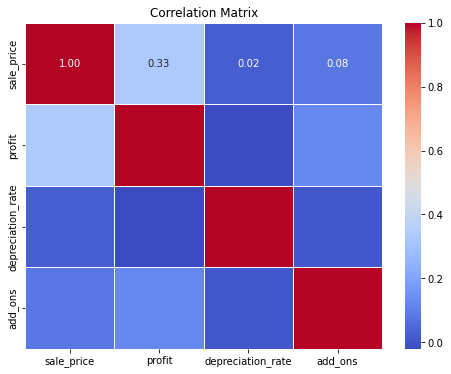

Correlation between Sale Price and Profit: 0.33 (p-value: 0.0000)
ANOVA Test Results: F-statistic = nan, p-value = nan
                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.016
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     8.277
Date:                Sat, 07 Dec 2024   Prob (F-statistic):           0.000272
Time:                        14:02:20   Log-Likelihood:                -10011.
No. Observations:                1000   AIC:                         2.003e+04
Df Residuals:                     997   BIC:                         2.004e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-----

/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:4133: DegenerateDataWarning: at least one input has length 0
  warnings.warn(stats.DegenerateDataWarning('at least one input '


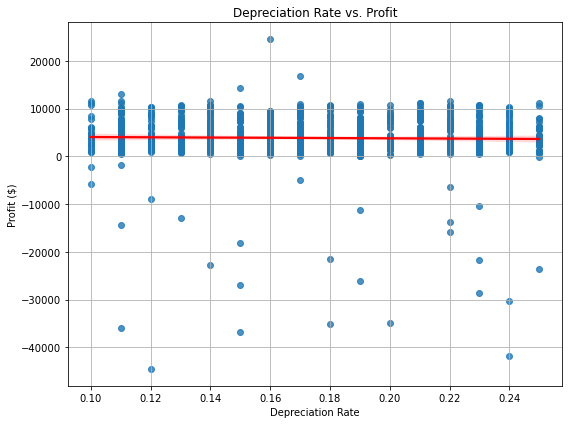

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, f_oneway
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Correlation Analysis
correlation_matrix = sales_data[['sale_price', 'profit', 'depreciation_rate', 'add_ons']].corr()

# Visualize the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Pairwise Correlation (e.g., Sale Price vs. Profit)
corr, p_value = pearsonr(sales_data['sale_price'], sales_data['profit'])
print(f"Correlation between Sale Price and Profit: {corr:.2f} (p-value: {p_value:.4f})")

# ANOVA: Does Payment Method Affect Profit?
anova_results = f_oneway(
    sales_data[sales_data['payment_method'] == 'Cash']['profit'],
    sales_data[sales_data['payment_method'] == 'Financing']['profit']
)
print(f"ANOVA Test Results: F-statistic = {anova_results.statistic:.2f}, p-value = {anova_results.pvalue:.4f}")

# Regression Analysis: Predicting Profit from Depreciation Rate and Add-Ons
# Add a constant for the regression model
sales_data['intercept'] = 1

# Define and fit the regression model
model = sm.OLS(sales_data['profit'], sales_data[['intercept', 'depreciation_rate', 'add_ons']])
results = model.fit()

# Display the regression results
print(results.summary())

# Visualize Regression: Depreciation Rate vs. Profit
plt.figure(figsize=(8, 6))
sns.regplot(x='depreciation_rate', y='profit', data=sales_data, line_kws={'color': 'red'})
plt.title('Depreciation Rate vs. Profit')
plt.xlabel('Depreciation Rate')
plt.ylabel('Profit ($)')
plt.grid(True)
plt.tight_layout()
plt.show()